<a href="https://colab.research.google.com/github/rodrigoviana-ds/Projetos/blob/main/AED_Profissional_de_Dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Perfil do Profissional de Dados no Brasil**

##**Pesquisa de Mercado pela comunidade Data Hackers - Nov/19.**


A profissão que vem aparecendo cada vez mais em alta tanto no Brasil quanto no mundo é a que envolve a área de dados. Dentre todas a que mais se destaca é a de Cientista de Dados. 

O que mais se observa nessa profissão são os salários. As suposições giram em salários altos, muitos acima dos R$ 20.000. Certamente existem profissionais que ganham nessa faixa. Mas será que essa é uma realidade da maioria? 

Com o intuito de responder a essa e outras perguntas, a equipe do Data Hackers - a maior comunidade de Data Science do Brasil - organizou uma pesquisa de âmbito nacional com profissionais da área.

A pesquisa, que contou com a participação de 1765 entrevistados, nos ajuda a entender o perfil do profissional de dados cada vez mais requisitado no mercado.


In [36]:
import pandas as pd

In [37]:
caminho = '/content/datahackers-survey-2019-anonymous-responses.csv'
dados = pd.read_csv(caminho)

In [38]:
dados.shape

(1765, 170)

In [130]:
dados.head()

,"('P0', 'id')","('P1', 'age')","('P2', 'gender')","('P3', 'living_in_brasil')","('P5', 'living_state')","('P6', 'born_or_graduated')","('P8', 'degreee_level')","('P10', 'job_situation')","('P12', 'workers_number')","('P13', 'manager')","('P16', 'salary_range')","('P17', 'time_experience_data_science')","('P18', 'time_experience_before')","('P19', 'is_data_science_professional')","('P20', 'linear_regression')","('P20', 'logistic_regression')","('P20', 'glms')","('P20', 'decision_tree')","('P20', 'random_forest')","('P20', 'neural_networks')","('P20', 'bayesian_inference')","('P20', 'ensemble')","('P20', 'svms')","('P20', 'cnns')","('P20', 'rnns')","('P20', 'hmms')","('P20', 'gans')","('P20', 'markov_chains')","('P20', 'nlp')","('P20', 'gradient_boosted_machines')","('P20', 'cluster_analysis')","('P20', 'survival_analysis')","('P20', 'longitudinal_data_analysis')","('P20', 'joint analysis')","('P20', 'no_listed_methods')","('P21', 'sql_')","('P21', 'r')","('P21', 'python')","('P21', 'c_c++_c#')","('P21', 'dotnet')",...,"('P33', 'other_brasilian_blogs')","('P33', 'other_slack_channels')","('P33', 'twitter')","('P33', 'abroad_blogs')","('P33', 'abroad_podcasts')","('P33', 'meetups_and_events')","('P33', 'only_data_hackers')","('P33', 'other')","('P34', 'udacity')","('P34', 'coursera')","('P34', 'udemy')","('P34', 'height')","('P34', 'edx')","('P34', 'data_camp')","('P34', 'data_quest')","('P34', 'kaggle_learn')","('P34', 'online_courses')","('P34', 'other')","('P35', 'data_science_plataforms_preference')","('P35', 'other')","('P36', 'draw_participation')","('D1', 'living_macroregion')","('D2', 'origin_macroregion')","('D3', 'anonymized_degree_area')","('D4', 'anonymized_market_sector')","('D5', 'anonymized_manager_level')","('D6', 'anonymized_role')",profissao,salario,idade,tamanho_da_empresa,gestor,se_considera_ds,sexo,experiencia_ds,tipo_de_trabalho,escolaridade,area_de_formacao,setor_de_mercado,plataforma_favorita
0,v9otv8j9wdvjrv9otvwnn9owhzq54ktv,37.0,Masculino,1,Minas Gerais (MG),1.0,Estudante de Graduação,Empregado (CTL),de 1 a 5,0.0,de R$ 1.001/mês a R$ 2.000/mês,Não tenho experiência na área de dados,Não tive experiência na área de TI/Engenharia ...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,Nunca fiz cursos online,NaN,1.0,Região Sudeste,NaN,Computação / Engenharia de Software / Sistemas...,Outras,NaN,Outras,Outras,1500.0,"[31, 40]",NaN,não,não,Masculino,Até 1 ano,Empregado (CTL),Estudante de Graduação,Computação / Engenharia de Software / Sistemas...,Outras,Nunca fiz cursos online
1,875ul998t0hqcv0871uptwf3oswcfv35,24.0,Feminino,1,São Paulo (SP),1.0,Estudante de Graduação,Empregado (CTL),Acima de 3000,0.0,de R$ 2.001/mês a R$ 3000/mês,Menos de 1 ano,Não tive experiência na área de TI/Engenharia ...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,NaN,Data Science Academy,0.0,Região Sudeste,NaN,Computação / Engenharia de Software / Sistemas...,Educação,NaN,Data Analyst/Analista de Dados,Analista de Dados,NaN,"[18, 24]",Grande,não,sim,Feminino,Até 1 ano,Empregado (CTL),Estudante de Graduação,Computação / Engenharia de Software / Sistemas...,Educação,NaN
2,puscuk079vw1pusbb900pzw2xvpxtgdk,26.0,Masculino,1,São Paulo (SP),1.0,Graduação/Bacharelado,Empregado (CTL),Acima de 3000,0.0,de R$ 4.001/mês a R$ 6.000/mês,de 1 a 2 anos,de 6 a 10 anos,1,0,0,0,0,1,1,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,Udemy,NaN,1.0,Região Sudeste,NaN,Outras Engenharias,Indústria (Manufatura),NaN,Outras,Outras,5000.0,"[25, 30]",Grande,não,sim,Masculino,De 1 a 3 anos,Empregado (CTL),Graduação/Bacharelado,Outras Engenharias,Indústria (Manufatura),Udemy
3,rmel8ewqpbffp2mnfbzermel8eqincov,21.0,Masculino,1,São Paulo (SP),0.0,Estudante de Graduação,Estagiário,de 11 a 50,0.0,de R$ 1.001/mês a R$ 2.000/mês,Menos de 1 ano,de 2 a 3 anos,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,

#**Tratamento do Conjunto de Dados**

O objetivo é limpar o conjunto de dados bem como entender suas variáveis.

##**Verificando Informações Faltantes**

In [40]:
dados.isnull().sum()

('P0', 'id')                             0
('P1', 'age')                           24
('P2', 'gender')                         3
('P3', 'living_in_brasil')               0
('P5', 'living_state')                 337
                                      ... 
('D2', 'origin_macroregion')          1440
('D3', 'anonymized_degree_area')        35
('D4', 'anonymized_market_sector')     243
('D5', 'anonymized_manager_level')    1460
('D6', 'anonymized_role')              514
Length: 170, dtype: int64

Algumas informações importantes para a análise possuem ausência de dados, como idade por exemplo.

In [41]:
# Colunas com dados faltantes

dados.isnull().sum() != 0

('P0', 'id')                          False
('P1', 'age')                          True
('P2', 'gender')                       True
('P3', 'living_in_brasil')            False
('P5', 'living_state')                 True
                                      ...  
('D2', 'origin_macroregion')           True
('D3', 'anonymized_degree_area')       True
('D4', 'anonymized_market_sector')     True
('D5', 'anonymized_manager_level')     True
('D6', 'anonymized_role')              True
Length: 170, dtype: bool

In [42]:
# Total de linhas sem resposta em cada coluna de dados faltantes

dados.isnull().sum()[dados.isnull().sum() != 0]

('P1', 'age')                                      24
('P2', 'gender')                                    3
('P5', 'living_state')                            337
('P6', 'born_or_graduated')                        34
('P12', 'workers_number')                         238
('P13', 'manager')                                238
('P16', 'salary_range')                           238
('P22', 'most_used_proggraming_languages')        859
('P29', 'have_data_warehouse')                    972
('P35', 'data_science_plataforms_preference')     140
('P35', 'other')                                 1625
('P36', 'draw_participation')                       4
('D1', 'living_macroregion')                      337
('D2', 'origin_macroregion')                     1440
('D3', 'anonymized_degree_area')                   35
('D4', 'anonymized_market_sector')                243
('D5', 'anonymized_manager_level')               1460
('D6', 'anonymized_role')                         514
dtype: int64

In [43]:
# Proporção de linhas faltantes em cada coluna (ordem crescente)

(dados.isnull().sum()[dados.isnull().sum() != 0]/dados.shape[0]).sort_values()

('P2', 'gender')                                 0.001700
('P36', 'draw_participation')                    0.002266
('P1', 'age')                                    0.013598
('P6', 'born_or_graduated')                      0.019263
('D3', 'anonymized_degree_area')                 0.019830
('P35', 'data_science_plataforms_preference')    0.079320
('P12', 'workers_number')                        0.134844
('P13', 'manager')                               0.134844
('P16', 'salary_range')                          0.134844
('D4', 'anonymized_market_sector')               0.137677
('P5', 'living_state')                           0.190935
('D1', 'living_macroregion')                     0.190935
('D6', 'anonymized_role')                        0.291218
('P22', 'most_used_proggraming_languages')       0.486686
('P29', 'have_data_warehouse')                   0.550708
('D2', 'origin_macroregion')                     0.815864
('D5', 'anonymized_manager_level')               0.827195
('P35', 'other

As últimas quatro colunas do output acima possuem proporções de "não resposta" bem altas. São colunas que não interferem no objetivo de nossa análise.

O que chama a atenção é a proporção de "não resposta" para a coluna **Most Used Proggraming Languages - Linguagens de programação mais usadas.** Um cientista de dados completo não se limita a uma ou duas linguagens. Talvez isso possa ter influenciado essa proporção alta.

##**Quantidade de Entrevistados em cada Profissão**

A área de dados envolve muitas profissões. O objetivo é ver a quantidade de entrevistados em cada uma delas e, se possível, agrupar algumas para deixar o conjunto de dados mais enxuto.

In [44]:
dados["('D6', 'anonymized_role')"].value_counts()

Desenvolvedor ou Engenheiro de Software    225
Outras                                     220
Data Scientist/Cientista de Dados          167
Data Analyst/Analista de Dados             163
Business Intelligence/Analista de BI       150
Data Engineer/Engenheiro de Dados          130
Business Analyst/Analista de Negócios       72
Analista de Inteligência de Mercado         29
Engenheiro                                  26
Analista de Marketing                       19
Engenheiro de Machine Learning              15
DBA/Administrador de Banco de Dados         14
Estatístico                                 11
Economista                                  10
Name: ('D6', 'anonymized_role'), dtype: int64

Observa-se no output acima uma grande quantidade de profissões que abrangem a área de dados. Por similaridade de funções, algumas foram agrupadas para otimizar a análise.

##**Agrupando algumas profissões**

As profissões foram agrupadas da seguinte forma:

*   **Estatístico + Cientista de Dados**
*   **Administrador de BD + Engenheiro de Dados**
*   **Economista + Engenheiros + Outras**

In [59]:
profmap = {'Desenvolvedor ou Engenheiro de Software': 'Desenvolvedor/Engenheiro de Software',
                                            'Outras': 'Outras',
                 'Data Scientist/Cientista de Dados': 'Cientista de Dados',
                    'Data Analyst/Analista de Dados': 'Analista de Dados',
              'Business Intelligence/Analista de BI': 'Analista de BI',
                 'Data Engineer/Engenheiro de Dados': 'Engenheiro de Dados',
            'Bussiness Analyst/Analista de Negócios': 'Analista de BI',
               'Analista de Inteligência de Mercado': 'Analista de BI',
                                        'Engenheiro': 'Outras',
                             'Analista de Marketing': 'Outras',
                    'Engenheiro de Machine Learning': 'Cientista de Dados',
               'DBA/Administrador de Banco de Dados': 'Engenheiro de Dados',
                                       'Estatístico': 'Cientista de Dados',
                                        'Economista': 'Outras'}

dados['profissao'] = dados["('D6', 'anonymized_role')"].map(profmap)

In [60]:
lista = ['Cientista de Dados', 'Analista de Dados', 'Analista de BI', 'Engenheiro de Dados']

pds = dados[dados['profissao'].isin(lista)] #Booleano pra voltar apenas as profissões listadas acima

cds = dados[dados['profissao'] == 'Cientista de Dados']

ads = dados[dados['profissao'] == 'Analista de Dados']

abi = dados[dados['profissao'] == 'Analista de BI']

eds = dados[dados['profissao'] == 'Engenheiro de Dados']

##**Faixa Salarial**

In [61]:
dados["('P16', 'salary_range')"].value_counts()

de R$ 4.001/mês a R$ 6.000/mês      308
de R$ 8.001/mês a R$ 12.000/mês     237
de R$ 6.001/mês a R$ 8.000/mês      229
de R$ 3.001/mês a R$ 4.000/mês      219
de R$ 1.001/mês a R$ 2.000/mês      181
de R$ 2.001/mês a R$ 3000/mês       150
de R$ 12.001/mês a R$ 16.000/mês     82
Menos de R$ 1.000/mês                48
de R$ 16.001/mês a R$ 20.000/mês     45
de R$ 20.001/mês a R$ 25.000/mês     15
Acima de R$ 25.001/mês               13
Name: ('P16', 'salary_range'), dtype: int64

A variável salário será transformada para variável contínua. Além disso o salário de cada intervalo será representado pelo salário central.

In [62]:
sala_map = {          'Menos de R$ 1.000/mês': 1000,
             'de R$ 1.001/mês a R$ 2.000/mês': 1500,
             'de R$ 2.001/mês a R$ 3.000/mês': 2500,
             'de R$ 3.001/mês a R$ 4.000/mês': 3500,
             'de R$ 4.001/mês a R$ 6.000/mês': 5000,
             'de R$ 6.001/mês a R$ 8.000/mês': 7500,
            'de R$ 8.001/mês a R$ 12.000/mês': 10000,
           'de R$ 12.001/mês a R$ 16.000/mês': 14000,
           'de R$ 16.001/mês a R$ 20.000/mês': 18000, 
            'de R$ 16001/mês a R$ 20.000/mês': 22500,
                     'Acima de R$ 25.001/mês': 25000}

dados['salario'] = dados["('P16', 'salary_range')"].map(sala_map)

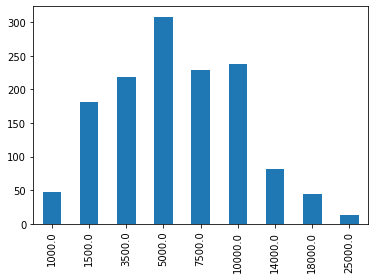

In [49]:
dados['salario'].value_counts().sort_index().plot(kind = 'bar');

O salário que mais se destaca é o de 5.000 reais. Além disso, a faixa salarial está bem distribuída entre 3.500 e 7.500 reais.

##**Idade**

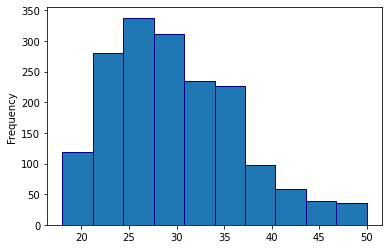

In [50]:
dados["('P1', 'age')"].plot(kind = 'hist', edgecolor = 'darkblue');

In [51]:
dados["('P1', 'age')"].describe().round(2)

count    1741.0
mean       29.8
std         6.6
min        18.0
25%        25.0
50%        29.0
75%        34.0
max        50.0
Name: ('P1', 'age'), dtype: float64

A idade média de um profissional de dados é 29 anos. Por se tratar de uma carreira nova, é natural que essa média caia com o passar do tempo.

##**Categorizando a Idade**

Agrupando as idades nas faixas etárias:

[18, 24] - [25, 30] - [31, 40] - [40, 50]

In [52]:
cortes = [0, 24, 30, 40, 100]
nomes = ['[18, 24]', '[25, 30]', '[31, 40]', '[41, 50]']

##**Tempo de Experiência na Área**

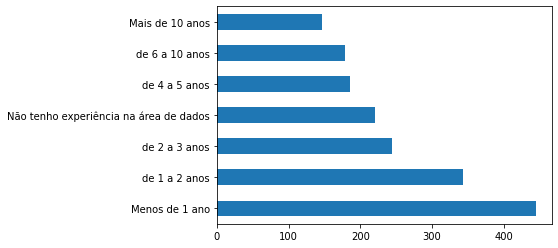

In [53]:
dados["('P17', 'time_experience_data_science')"].value_counts().plot(kind = 'barh')

##**Categorizando o Tempo de Experiência**

In [63]:
tempo_xs_ds = {          'Menos de 1 ano': 'Até 1 ano',
 'Não tenho experiência na área de dados': 'Até 1 ano',
                          'de 1 a 2 anos': 'De 1 a 3 anos',
                          'de 2 a 3 anos': 'De 1 a 3 anos',
                          'de 4 a 5 anos': 'De 3 a 5 anos',
                         'de 6 a 10 anos': 'Maior que 5',
                        'Mais de 10 anos': 'Maior que 5'}

#**Classificando o Tamanho da Empresa**

O tamanho da empresa foi definido de acordo com o número de colaboradores

In [64]:
tammap = { 'de 1 a 5 colaboradores': 'Pequena',
                        'de 6 a 10': 'Pequena', 
                          '11 a 50': 'Pequena', 
                         '51 a 100': 'Pequena', 
                        '101 a 500': 'Média',
                       '501 a 1000': 'Média',
                   'de 1001 a 3000': 'Grande', 
                    'Acima de 3000': 'Grande'}

##**Escolaridade**

Por se tratar de uma carreira nova ainda são ofertados poucos cursos na área, procipalmente graduação e pós.

In [65]:
from pandas.api.types import CategoricalDtype

In [66]:
esc_map = CategoricalDtype(
    ['Prefiro não informar', 'Não tenho graduação formal', 'Estudante de Graduação',
     'Graduação/Bacharelado', 'Pós-graduação', 'Mestrado', 'Doutorado ou Phd'], ordered = True)

##**Criando um Novo Dataset com as Informações de Maior Interesse**

A seleção das variáveis se deu pelo objetivo da análise que é conhecer o perfil do profissional de dados.

In [68]:
dados['idade'] = pd.cut(dados["('P1', 'age')"], bins = cortes, labels = nomes)

dados['salario'] = dados["('P16', 'salary_range')"].map(sala_map)

dados['tamanho_da_empresa'] = dados["('P12', 'workers_number')"].map(tammap)

dados['gestor'] = dados["('P13', 'manager')"].map({0: 'não', 1: 'sim'})

dados['se_considera_ds'] = dados["('P19', 'is_data_science_professional')"].map({0: 'não', 1: 'sim'})

dados['sexo'] = dados["('P2', 'gender')"]

dados['experiencia_ds'] = dados["('P17', 'time_experience_data_science')"].map(tempo_xs_ds)

dados['tipo_de_trabalho'] = dados["('P10', 'job_situation')"]

dados['escolaridade'] = dados["('P8', 'degreee_level')"].astype(esc_map)

dados['area_de_formacao'] = dados["('D3', 'anonymized_degree_area')"]

dados['setor_de_mercado'] = dados["('D4', 'anonymized_market_sector')"]

dados['plataforma_favorita'] = dados["('P35', 'data_science_plataforms_preference')"]

#**Perfil do Profissional de Dados**

##**1) Gênero**

In [131]:
(dados["('P2', 'gender')"].value_counts()/dados.shape[0]).round(4)

Masculino    0.8136
Feminino     0.1847
Name: ('P2', 'gender'), dtype: float64

Hoje é uma carreira majoritariamente masculina (81,36%). Mas a tendência é que o número de mulheres na área aumente com o passar do tempo. 

##**2) Moradia**

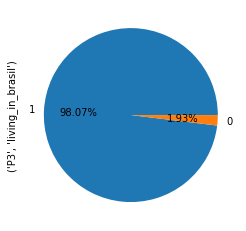

In [77]:
dados["('P3', 'living_in_brasil')"].value_counts().plot(kind = 'pie', autopct='%1.2f%%');

Nota-se que a maioria dos profissionais reside no Brasil.

###**Região**

In [129]:
dados.filter(regex = 'D2').value_counts()

('D2', 'origin_macroregion')
Região Sudeste                  154
Região Nordeste                  77
Região Sul                       51
Região Centro-Oeste              26
Região Norte                     17
dtype: int64

A maior parte das vagas se concentra no eixo RJ e SP. É natural que mais da metade dos profissionais, então, concentre moradia na região Sudeste.

##**3) Pós Graduação**

In [132]:
(dados["('P8', 'degreee_level')"].value_counts()/dados.shape[0]).round(4)


Graduação/Bacharelado         0.3275
Pós-graduação                 0.2986
Estudante de Graduação        0.2119
Mestrado                      0.1139
Doutorado ou Phd              0.0283
Não tenho graduação formal    0.0193
Prefiro não informar          0.0006
Name: ('P8', 'degreee_level'), dtype: float64

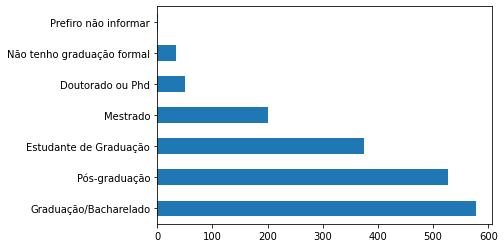

In [80]:
dados["('P8', 'degreee_level')"].value_counts().plot(kind = 'barh');

Nota-se que poucos profissionais tenham uma titulação superior ao mestrado. Muitos cursos de pós graduação (MBA) vêm sendo desenvolvidos, o que ajuda a explicar uma porcentagem maior de profissionais com essa titulação.

##**4) Situação de Emprego Atual**

In [81]:
dados["('P10', 'job_situation')"].value_counts()

Empregado (CTL)                                  1073
Empreendedor ou Empregado (CNPJ)                  234
Estagiário                                        131
Somente Estudante (graduação)                      85
Desempregado, buscando recolocação                 69
Servidor Público                                   60
Trabalho na área Acadêmica/Pesquisador             45
Somente Estudante (pós-graduação)                  36
Freelancer                                         23
Prefiro não dizer                                   6
Desempregado e não estou buscando recolocação       3
Name: ('P10', 'job_situation'), dtype: int64

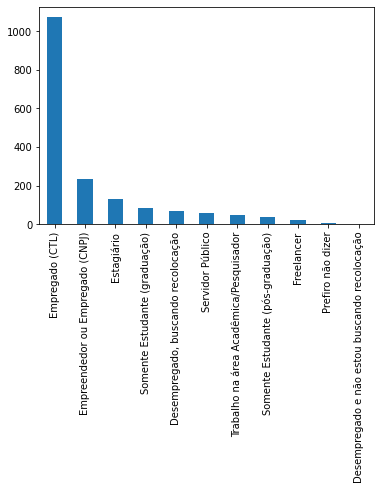

In [82]:
dados["('P10', 'job_situation')"].value_counts().plot(kind = 'bar')

A maioria dos empregados são CLT. Por se tratar de um profissional cada vez mais requisitado é natural que as empresas optem por esse tipo de contratação ao invés de PJ, por exemplo.

##**5) Salário dos Profissionais de Dados**

###**Média Salarial de um Analista de BI**

In [92]:
sal_abi = abi['salario'].mean()

print('O salário médio de um Analista de BI é de: R$ {:.2f}'.format(sal_abi))

O salário médio de um Analista de BI é de: R$ 5018.63


###**Média Salarial de um Analista de Dados**

In [93]:
sal_ads = ads['salario'].mean()

print('O salário médio de um Analista de Dados é de: R$ {:.2f}'.format(sal_ads))

O salário médio de um Analista de Dados é de: R$ 5393.84


###**Média Salarial de um Engenheiro de Dados**

In [96]:
sal_eds = eds['salario'].mean()

print('O salário médio de um Engenheiro de Dados é de: R$ {:.2f}'.format(sal_eds))

O salário médio de um Engenheiro de Dados é de: R$ 8244.19


###**Média Salarial de um Cientista de Dados**

In [97]:
sal_cds = cds['salario'].mean()

print('O salário médio de um Cientista de Dados é de: R$ {:.2f}'.format(sal_cds))

O salário médio de um Cientista de Dados é de: R$ 7028.57


##**6) Média Salarial por Tempo de Experiência**

###**Analista de BI**

In [99]:
abi['salario'].groupby(abi['experiencia_ds']).describe()[['count', 'mean']].round(2)

,count,mean
experiencia_ds,,
Até 1 ano,48.0,3093.75
De 1 a 3 anos,60.0,4308.33
De 3 a 5 anos,21.0,6285.71
Maior que 5,32.0,8406.25


###**Analista de Dados**

In [100]:
ads['salario'].groupby(ads['experiencia_ds']).describe()[['count', 'mean']].round(2)

,count,mean
experiencia_ds,,
Até 1 ano,37.0,3608.11
De 1 a 3 anos,63.0,4944.44
De 3 a 5 anos,21.0,6690.48
Maior que 5,25.0,8080.00


###**Engenheiro de Dados**

In [101]:
eds['salario'].groupby(eds['experiencia_ds']).describe()[['count', 'mean']].round(2)

,count,mean
experiencia_ds,,
Até 1 ano,24.0,5479.17
De 1 a 3 anos,51.0,6941.18
De 3 a 5 anos,22.0,9000.00
Maior que 5,32.0,11875.00


###**Cientista de Dados**

In [102]:
cds['salario'].groupby(cds['experiencia_ds']).describe()[['count', 'mean']].round(2)

,count,mean
experiencia_ds,,
Até 1 ano,35.0,3900.00
De 1 a 3 anos,94.0,6303.19
De 3 a 5 anos,24.0,10104.17
Maior que 5,22.0,11750.00


Quanto maior experiência na área maior é o salário. Vale ressaltar que o salário para quem tem menos de um ano de experiência, em todas as profissões destacadas, é superior aos 3.000 reais.

##**7) Média Salarial por Sexo**

###**Analista de BI**

In [103]:
abi['salario'].groupby(abi['sexo']).describe()[['count', 'mean']].round(2)

,count,mean
sexo,,
Feminino,26.0,5057.69
Masculino,135.0,5011.11


###**Analista de Dados**

In [104]:
ads['salario'].groupby(ads['sexo']).describe()[['count', 'mean']].round(2)

,count,mean
sexo,,
Feminino,33.0,5363.64
Masculino,113.0,5402.65


###**Engenheiro de Dados**

In [105]:
eds['salario'].groupby(eds['sexo']).describe()[['count', 'mean']].round(2)

,count,mean
sexo,,
Feminino,18.0,6888.89
Masculino,111.0,8463.96


###**Cientista de Dados**

In [106]:
cds['salario'].groupby(cds['sexo']).describe()[['count', 'mean']].round(2)

,count,mean
sexo,,
Feminino,28.0,6160.71
Masculino,146.0,7236.30


À exceção de Analista de BI, nas outras três profissões o salário masculino é maior que o feminino. Chama a atenção para a discrepância dos salários nas funções de Engenheiro e Cientista de Dados, onde o salário referente ao sexo masculino é 17% e 22% maior, respectivamente, ao feminino.

É algo que espera-se diminuir ao longo do tempo, pois não há o que justifique tamanha diferença.

##**9) Linguagem de Programação**

###**Analista de BI**

In [113]:
abi.filter(regex = 'P21').sum().sort_values(ascending = False)/abi.shape[0]

('P21', 'sql_')                   0.424581
('P21', 'python')                 0.324022
('P21', 'r')                      0.145251
('P21', 'visual_basic_vba')       0.061453
('P21', 'sas_stata')              0.044693
('P21', 'java')                   0.022346
('P21', 'no_listed_languages')    0.016760
('P21', 'dotnet')                 0.016760
('P21', 'c_c++_c#')               0.016760
('P21', 'php')                    0.011173
('P21', 'matlab')                 0.011173
('P21', 'scala')                  0.005587
('P21', 'julia')                  0.005587
dtype: float64

###**Analista de Dados**

In [114]:
ads.filter(regex = 'P21').sum().sort_values(ascending = False)/ads.shape[0]

('P21', 'sql_')                   0.723926
('P21', 'python')                 0.662577
('P21', 'r')                      0.233129
('P21', 'visual_basic_vba')       0.092025
('P21', 'sas_stata')              0.073620
('P21', 'php')                    0.061350
('P21', 'c_c++_c#')               0.055215
('P21', 'java')                   0.049080
('P21', 'matlab')                 0.030675
('P21', 'scala')                  0.030675
('P21', 'dotnet')                 0.012270
('P21', 'julia')                  0.006135
('P21', 'no_listed_languages')    0.000000
dtype: float64

###**Engenheiro de Dados**

In [115]:
eds.filter(regex = 'P21').sum().sort_values(ascending = False)/eds.shape[0]

('P21', 'python')                 0.652778
('P21', 'sql_')                   0.604167
('P21', 'scala')                  0.138889
('P21', 'java')                   0.111111
('P21', 'r')                      0.111111
('P21', 'c_c++_c#')               0.048611
('P21', 'php')                    0.027778
('P21', 'sas_stata')              0.020833
('P21', 'dotnet')                 0.020833
('P21', 'visual_basic_vba')       0.013889
('P21', 'no_listed_languages')    0.000000
('P21', 'matlab')                 0.000000
('P21', 'julia')                  0.000000
dtype: float64

###**Cientista de Dados**

In [116]:
cds.filter(regex = 'P21').sum().sort_values(ascending = False)/cds.shape[0]

('P21', 'python')                 0.896373
('P21', 'sql_')                   0.730570
('P21', 'r')                      0.383420
('P21', 'sas_stata')              0.088083
('P21', 'scala')                  0.082902
('P21', 'visual_basic_vba')       0.051813
('P21', 'java')                   0.041451
('P21', 'c_c++_c#')               0.031088
('P21', 'matlab')                 0.025907
('P21', 'julia')                  0.010363
('P21', 'dotnet')                 0.010363
('P21', 'php')                    0.005181
('P21', 'no_listed_languages')    0.000000
dtype: float64

Nota-se que as linguagens Python, R e SQL são as que predominam entre os profissionais de dados. Possuem porcentagens bem altas.

Chama a atenção também a quantidade de outras linguagens utilizadas. Trabalhar com dados é complexo e exige um roll maior de conhecimento.

##**10) Modelos Mais Utilizados**

###**Analista de BI**

In [117]:
abi.filter(regex = 'P20').sum().sort_values(ascending = False)/abi.shape[0]

('P20', 'no_listed_methods')             0.229050
('P20', 'linear_regression')             0.201117
('P20', 'decision_tree')                 0.128492
('P20', 'cluster_analysis')              0.111732
('P20', 'logistic_regression')           0.106145
('P20', 'nlp')                           0.078212
('P20', 'bayesian_inference')            0.072626
('P20', 'neural_networks')               0.067039
('P20', 'random_forest')                 0.050279
('P20', 'svms')                          0.033520
('P20', 'markov_chains')                 0.027933
('P20', 'joint analysis')                0.027933
('P20', 'cnns')                          0.022346
('P20', 'gradient_boosted_machines')     0.022346
('P20', 'glms')                          0.022346
('P20', 'survival_analysis')             0.016760
('P20', 'longitudinal_data_analysis')    0.011173
('P20', 'ensemble')                      0.005587
('P20', 'rnns')                          0.005587
('P20', 'hmms')                          0.000000


O método mais utilizado pelo Analista de BI é o Power BI, que não estava listado no questionário.

###**Analista de Dados**

In [118]:
ads.filter(regex = 'P20').sum().sort_values(ascending = False)/ads.shape[0]

('P20', 'linear_regression')             0.361963
('P20', 'logistic_regression')           0.300613
('P20', 'decision_tree')                 0.276074
('P20', 'cluster_analysis')              0.251534
('P20', 'no_listed_methods')             0.251534
('P20', 'random_forest')                 0.214724
('P20', 'bayesian_inference')            0.159509
('P20', 'nlp')                           0.141104
('P20', 'joint analysis')                0.067485
('P20', 'svms')                          0.067485
('P20', 'neural_networks')               0.067485
('P20', 'gradient_boosted_machines')     0.055215
('P20', 'glms')                          0.055215
('P20', 'ensemble')                      0.042945
('P20', 'survival_analysis')             0.042945
('P20', 'longitudinal_data_analysis')    0.036810
('P20', 'markov_chains')                 0.030675
('P20', 'cnns')                          0.024540
('P20', 'rnns')                          0.012270
('P20', 'gans')                          0.000000


###**Engenheiro de Dados**

In [119]:
eds.filter(regex = 'P20').sum().sort_values(ascending = False)/eds.shape[0]

('P20', 'no_listed_methods')             0.291667
('P20', 'linear_regression')             0.270833
('P20', 'decision_tree')                 0.180556
('P20', 'nlp')                           0.159722
('P20', 'random_forest')                 0.159722
('P20', 'cluster_analysis')              0.145833
('P20', 'logistic_regression')           0.145833
('P20', 'neural_networks')               0.125000
('P20', 'bayesian_inference')            0.104167
('P20', 'ensemble')                      0.055556
('P20', 'gradient_boosted_machines')     0.055556
('P20', 'svms')                          0.055556
('P20', 'cnns')                          0.048611
('P20', 'rnns')                          0.041667
('P20', 'joint analysis')                0.041667
('P20', 'survival_analysis')             0.013889
('P20', 'hmms')                          0.013889
('P20', 'glms')                          0.013889
('P20', 'markov_chains')                 0.013889
('P20', 'longitudinal_data_analysis')    0.013889


O Engenheiro de Dados está mais voltado para desenvolver, construir, testar e manter banco de dados e sistemas de processamento. Assim, utiliza mais o SQL ou outro servidor para Banco de Dados.

###**Cientista de Dados**

In [120]:
cds.filter(regex = 'P20').sum().sort_values(ascending = False)/cds.shape[0]

('P20', 'linear_regression')             0.740933
('P20', 'logistic_regression')           0.673575
('P20', 'decision_tree')                 0.652850
('P20', 'random_forest')                 0.647668
('P20', 'cluster_analysis')              0.601036
('P20', 'neural_networks')               0.461140
('P20', 'gradient_boosted_machines')     0.445596
('P20', 'ensemble')                      0.398964
('P20', 'nlp')                           0.352332
('P20', 'bayesian_inference')            0.321244
('P20', 'svms')                          0.305699
('P20', 'glms')                          0.290155
('P20', 'rnns')                          0.181347
('P20', 'longitudinal_data_analysis')    0.176166
('P20', 'cnns')                          0.165803
('P20', 'markov_chains')                 0.134715
('P20', 'survival_analysis')             0.134715
('P20', 'joint analysis')                0.067358
('P20', 'gans')                          0.046632
('P20', 'hmms')                          0.041451


Tanto para Analista e Cientista de Dados, os três modelos mais utilizados são: **Regressão Linear, Regressão Logística e Árvore de Decisão**.

##**Cursos Extras**

O profissional de dados precisa se atualizar constantemente. Vamos ver as plataformas mais acessadas por esses profissionais na busca por complementar o currículo.

###**Analista de BI**

In [125]:
abi.filter(regex = 'P34').sum().sort_values(ascending = False)/abi.shape[0]

('P34', 'udemy')             0.709497
('P34', 'udacity')           0.268156
('P34', 'coursera')          0.245810
('P34', 'other')             0.201117
('P34', 'kaggle_learn')      0.195531
('P34', 'height')            0.173184
('P34', 'data_camp')         0.162011
('P34', 'edx')               0.117318
('P34', 'online_courses')    0.078212
('P34', 'data_quest')        0.033520
dtype: float64

###**Analista de Dados**

In [126]:
ads.filter(regex = 'P34').sum().sort_values(ascending = False)/ads.shape[0]

('P34', 'udemy')             0.742331
('P34', 'coursera')          0.435583
('P34', 'udacity')           0.331288
('P34', 'data_camp')         0.220859
('P34', 'kaggle_learn')      0.208589
('P34', 'other')             0.177914
('P34', 'height')            0.171779
('P34', 'edx')               0.134969
('P34', 'online_courses')    0.061350
('P34', 'data_quest')        0.036810
dtype: float64

###**Engenheiro de Dados**

In [127]:
eds.filter(regex = 'P34').sum().sort_values(ascending = False)/eds.shape[0]

('P34', 'udemy')             0.673611
('P34', 'coursera')          0.388889
('P34', 'udacity')           0.319444
('P34', 'height')            0.256944
('P34', 'data_camp')         0.180556
('P34', 'edx')               0.104167
('P34', 'online_courses')    0.097222
('P34', 'kaggle_learn')      0.090278
('P34', 'other')             0.083333
('P34', 'data_quest')        0.034722
dtype: float64

###**Cientista de Dados**

In [128]:
cds.filter(regex = 'P34').sum().sort_values(ascending = False)/cds.shape[0]

('P34', 'udemy')             0.663212
('P34', 'coursera')          0.632124
('P34', 'udacity')           0.487047
('P34', 'data_camp')         0.393782
('P34', 'edx')               0.300518
('P34', 'kaggle_learn')      0.295337
('P34', 'height')            0.129534
('P34', 'online_courses')    0.056995
('P34', 'other')             0.046632
('P34', 'data_quest')        0.046632
dtype: float64

Pela variedade e também pelo custo, as plataformas mais utilizadas pelos profissionais de dados na busca em complementar a formação são **Udemy e Coursera.**

#**Considerações Finais**

A carreira de dados está no seu início e vem sendo muito reconhecida. Hoje não se toma decisões sem dados. As empresas precisam otimizar processos e entender melhor o perfil da sua base de clientes para ofertar a eles produtos e melhores experiências.

É uma carreira que envolve bastante estudo e atualização constantes. Agora que começam a surgir cursos de graduação voltados para a área. Acredito que o boom esteja na iminência. 

Mesmo assim os salário ofertados são satisfatórios ainda que consideremos o nível de experiência. Infelizmente ainda há uma discrepância de salários em relação ao gênero e espera-se que isso se nivele num futuro próximo.

